In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [7]:
test = pd.read_csv("movies_test.csv")
train = pd.read_csv("movies_train.csv")

## 데이터 탐색

array([[<AxesSubplot: title={'center': 'time'}>,
        <AxesSubplot: title={'center': 'dir_prev_bfnum'}>],
       [<AxesSubplot: title={'center': 'dir_prev_num'}>,
        <AxesSubplot: title={'center': 'num_staff'}>],
       [<AxesSubplot: title={'center': 'num_actor'}>,
        <AxesSubplot: title={'center': 'box_off_num'}>]], dtype=object)

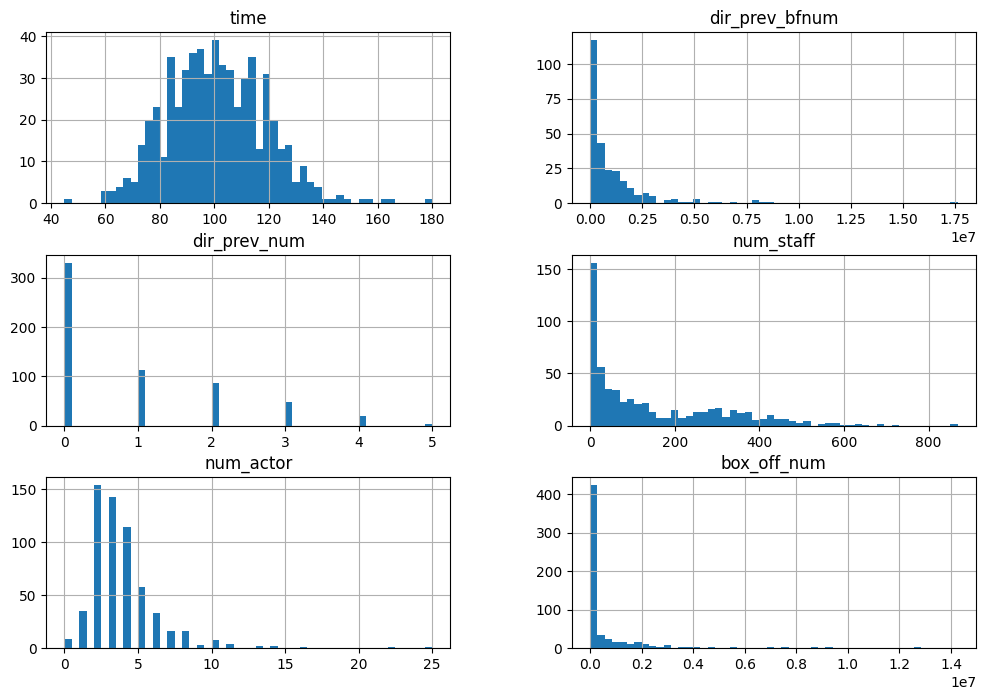

In [8]:
train.hist(figsize = (12,8), bins = 50)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [11]:
print(train.shape, test.shape)

(600, 12) (243, 11)


In [12]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3342/3154322836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True)


<AxesSubplot: >

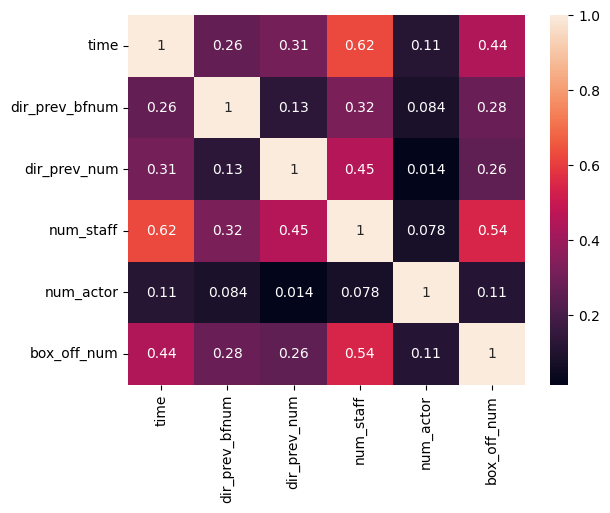

In [13]:
sns.heatmap(train.corr(), annot = True)

In [14]:
# 결측치 확인
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [15]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

## 데이터 전처리

In [16]:
# 결측치 0으로 대체
train["dir_prev_bfnum"] = train["dir_prev_bfnum"].fillna(0)
test["dir_prev_bfnum"] = test["dir_prev_bfnum"].fillna(0)

In [17]:
# 결측치 재 확인
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [18]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [19]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

In [20]:
train['genre_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['genre_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [21]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,genre_rank
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,12
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,11
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,9
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,9


In [22]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_rank
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,12
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,5
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,8
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,11
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,7


/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_3342/3154322836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True)


<AxesSubplot: >

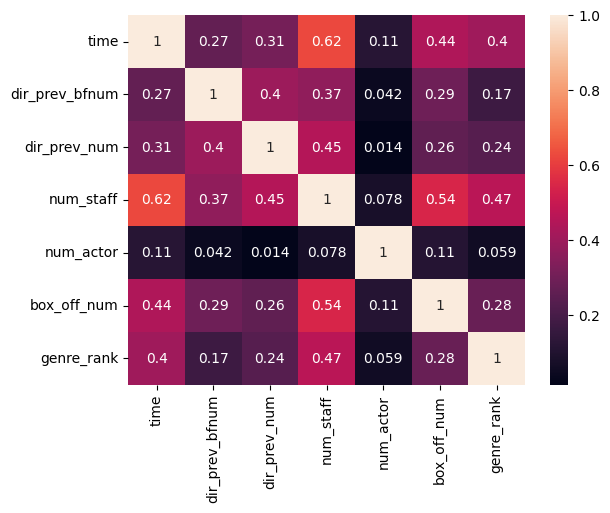

In [23]:
sns.heatmap(train.corr(), annot = True)

## 학습, 예측 데이터셋 만들기

In [24]:
label_name = "box_off_num"
label_name

'box_off_num'

In [25]:
feature_names = ['time', 'dir_prev_num', 'num_staff', 'genre_rank']
feature_names

['time', 'dir_prev_num', 'num_staff', 'genre_rank']

In [26]:
X_train = train[feature_names]
X_train.shape

(600, 4)

In [27]:
y_train = train[label_name]
y_train.shape

(600,)

In [28]:
X_test = test[feature_names]
X_test.shape

(243, 4)

## 머신러닝 알고리즘 불러오기

In [29]:
model = DecisionTreeRegressor(random_state=42)

In [30]:
max_depth = list(range(5, 300))
max_features = [0.3, 0.5, 0.7, 0.9]
parameters = {"max_depth":max_depth, "max_features": max_features}
from matplotlib.streamplot import Grid
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs = -1, cv = 5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, 34, ...],
                         'max_features': [0.3, 0.5, 0.7, 0.9]})

## 머신러닝 학습

In [31]:
clf.best_estimator_.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features=0.3, random_state=42)

## 교차검증

In [32]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cross_val_score(clf.best_estimator_, X_train, y_train, cv = 5)

array([ 0.39969592, -0.89039433,  0.21930245,  0.23774974,  0.23199231])

In [33]:
y_valid_predict = cross_val_predict(clf.best_estimator_, X_train, y_train, cv = 5)
y_valid_predict[:5]

array([5.32475000e+03, 6.92820743e+06, 6.92820743e+06, 1.12388000e+04,
       7.78719143e+05])

##  정확도 측정

In [34]:
from sklearn.metrics import r2_score
r2_score(y_train, y_valid_predict)

0.1454905634800694

In [35]:
clf.best_estimator_.score(X_train, y_train)

0.6939177413354662

## 예측

In [36]:
y_test_pred = clf.best_estimator_.predict(X_test)
y_test_pred [:5]

array([2971475.        , 1188191.96774194, 1572407.35294118,
       1572407.35294118,  391770.2804878 ])

## 데이콘 제출

In [37]:
submit = pd.read_csv("submission.csv")
submit.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [38]:
submit["box_off_num"] = y_test_pred

In [39]:
submit.to_csv("dacon_submission.csv", index=False)

In [40]:
pd.read_csv("dacon_submission.csv").head()

,title,box_off_num
0,용서는 없다,2.971475e+06
1,아빠가 여자를 좋아해,1.188192e+06
2,하모니,1.572407e+06
3,의형제,1.572407e+06
4,평행 이론,3.917703e+05
